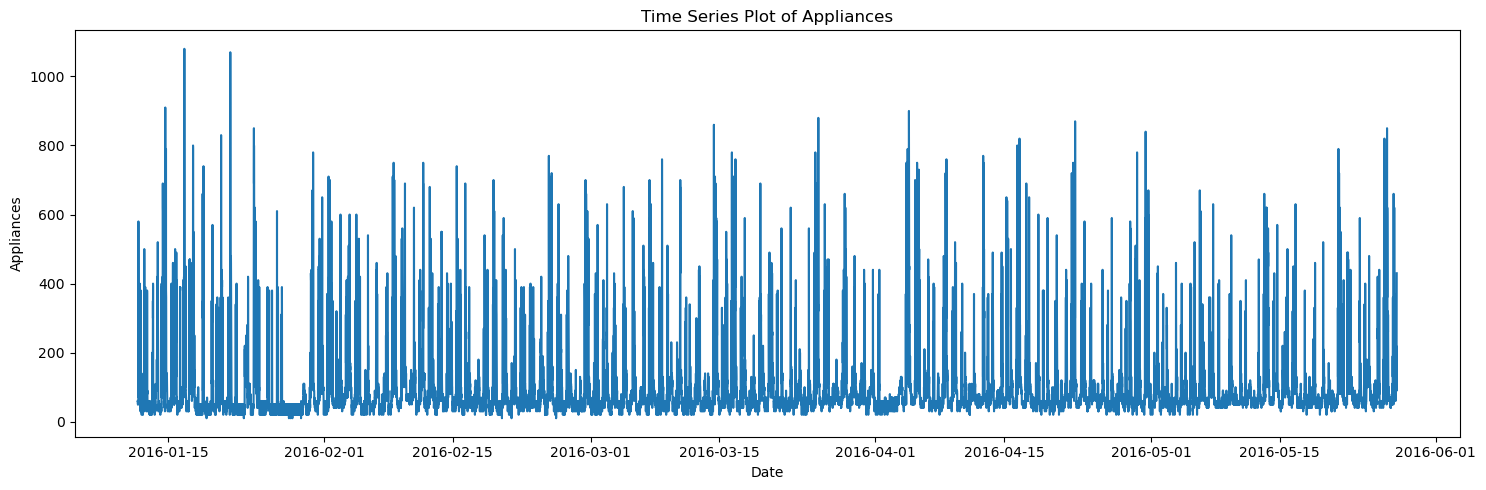

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


data = pd.read_csv('energydata_complete.csv')
# Preprocessing
# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])


variables_to_plot = ['Appliances']

# Plotting
plt.figure(figsize=(15, 5 * len(variables_to_plot)))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    plt.plot(data['date'], data[var])
    plt.title(f'Time Series Plot of {var}')
    plt.xlabel('Date')
    plt.ylabel(var)

plt.tight_layout()
plt.show()



In [4]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


In [5]:
data = read_csv('energydata_complete.csv')
data['date'] = to_datetime(data['date'])
data.head()



,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# LSTM

In [13]:
data = read_csv('energydata_complete.csv')
data['date'] = to_datetime(data['date'])
data.set_index('date', inplace=True)
data.drop(data.columns[[1, -2, -1]], axis=1, inplace=True)

# Preprocessing
values = data.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning

reframed = series_to_supervised(scaled, 1, 1)

columns_to_drop = list(range(26, 50))  # This will create a list of columns from index 26 to 50
reframed.drop(reframed.columns[columns_to_drop], axis=1, inplace=True)



print(reframed.head())



   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729    0.32735   0.566187   0.225345   0.684038   0.215188   
2   0.046729    0.32735   0.541326   0.225345   0.682140   0.215188   
3   0.037383    0.32735   0.530502   0.225345   0.679445   0.215188   
4   0.037383    0.32735   0.524080   0.225345   0.678414   0.215188   
5   0.046729    0.32735   0.531419   0.225345   0.676727   0.215188   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var17(t-1)  var18(t-1)  \
1   0.746066   0.351351   0.764262    0.175506  ...    0.661412    0.223032   
2   0.748871   0.351351   0.782437    0.175506  ...    0.660155    0.226500   
3   0.755569   0.344745   0.778062    0.175506  ...    0.655586    0.219563   
4   0.758685   0.341441   0.770949    0.175506  ...    0.650788    0.219563   
5   0.758685   0.341441   0.762697    0.178691  ...    0.650788    0.219563   

   var19(t-1)  var20(t-1)  var21(t-1)  var22(t-1)  var23(t-1)  var24(t-1)  \
1    0.677290    0.37

In [14]:
values = reframed.values
n = int(len(values) * 0.8)
train = values[:n, :]
test = values[n:, :]
# split into input and outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(15787, 1, 25) (15787,) (3947, 1, 25) (3947,)


Epoch 1/150
158/158 - 3s - loss: 0.0104 - val_loss: 0.0076 - 3s/epoch - 22ms/step
Epoch 2/150
158/158 - 1s - loss: 0.0086 - val_loss: 0.0061 - 607ms/epoch - 4ms/step
Epoch 3/150
158/158 - 1s - loss: 0.0073 - val_loss: 0.0048 - 590ms/epoch - 4ms/step
Epoch 4/150
158/158 - 1s - loss: 0.0061 - val_loss: 0.0040 - 595ms/epoch - 4ms/step
Epoch 5/150
158/158 - 1s - loss: 0.0053 - val_loss: 0.0037 - 591ms/epoch - 4ms/step
Epoch 6/150
158/158 - 1s - loss: 0.0048 - val_loss: 0.0037 - 648ms/epoch - 4ms/step
Epoch 7/150
158/158 - 1s - loss: 0.0046 - val_loss: 0.0038 - 578ms/epoch - 4ms/step
Epoch 8/150
158/158 - 1s - loss: 0.0045 - val_loss: 0.0039 - 580ms/epoch - 4ms/step
Epoch 9/150
158/158 - 1s - loss: 0.0044 - val_loss: 0.0041 - 572ms/epoch - 4ms/step
Epoch 10/150
158/158 - 1s - loss: 0.0044 - val_loss: 0.0043 - 571ms/epoch - 4ms/step
Epoch 11/150
158/158 - 1s - loss: 0.0044 - val_loss: 0.0045 - 572ms/epoch - 4ms/step
Epoch 12/150
158/158 - 1s - loss: 0.0044 - val_loss: 0.0046 - 588ms/epoch - 

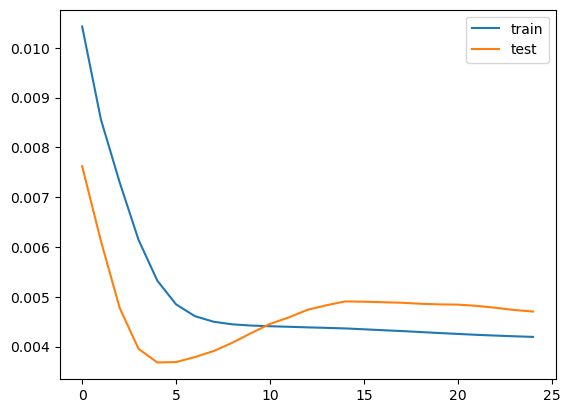

In [15]:
# reshape input to be 3D [samples, timesteps, features]
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(13, activation = 'relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=150, batch_size=100, validation_data=(X_test, y_test), verbose=2, shuffle=False, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [10]:
# make a prediction
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
test_mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % test_mae)

124/124 [==============================] - 1s 3ms/step
Test RMSE: 62.252
Test MAE: 27.579


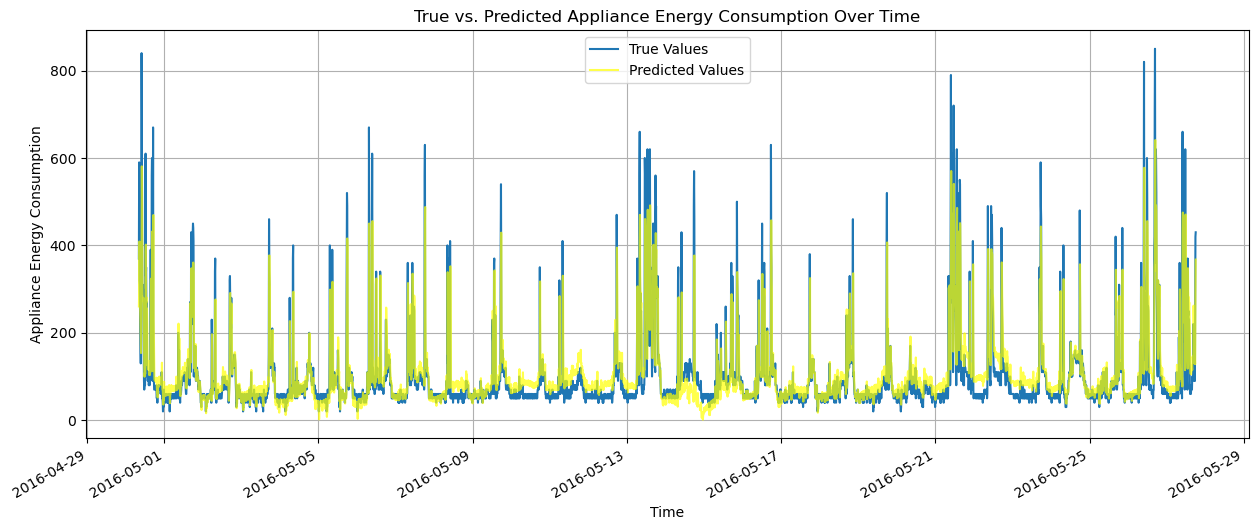

In [23]:
# Extracting timestamps for the test dataset
test_timestamps = data.iloc[-len(X_test):].index
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(data["Appliances"].values.reshape(-1, 1))
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(test_timestamps, target_scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
plt.plot(test_timestamps, inv_yhat, label='Predicted Values', alpha=0.7, color = 'yellow')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.title('True vs. Predicted Appliance Energy Consumption Over Time')
plt.legend()
plt.grid(True)

# Formatting the date on the x-axis for better readability

plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()



# SRN

(15787, 1, 25) (15787,) (3947, 1, 25) (3947,)
Epoch 1/150
158/158 - 3s - loss: 0.0200 - val_loss: 0.0119 - 3s/epoch - 17ms/step
Epoch 2/150
158/158 - 1s - loss: 0.0130 - val_loss: 0.0091 - 555ms/epoch - 4ms/step
Epoch 3/150
158/158 - 1s - loss: 0.0105 - val_loss: 0.0072 - 605ms/epoch - 4ms/step
Epoch 4/150
158/158 - 1s - loss: 0.0090 - val_loss: 0.0062 - 539ms/epoch - 3ms/step
Epoch 5/150
158/158 - 1s - loss: 0.0081 - val_loss: 0.0059 - 578ms/epoch - 4ms/step
Epoch 6/150
158/158 - 1s - loss: 0.0075 - val_loss: 0.0061 - 557ms/epoch - 4ms/step
Epoch 7/150
158/158 - 1s - loss: 0.0070 - val_loss: 0.0065 - 603ms/epoch - 4ms/step
Epoch 8/150
158/158 - 1s - loss: 0.0067 - val_loss: 0.0070 - 563ms/epoch - 4ms/step
Epoch 9/150
158/158 - 1s - loss: 0.0064 - val_loss: 0.0074 - 574ms/epoch - 4ms/step
Epoch 10/150
158/158 - 1s - loss: 0.0062 - val_loss: 0.0076 - 550ms/epoch - 3ms/step
Epoch 11/150
158/158 - 1s - loss: 0.0060 - val_loss: 0.0078 - 531ms/epoch - 3ms/step
Epoch 12/150
158/158 - 1s - lo

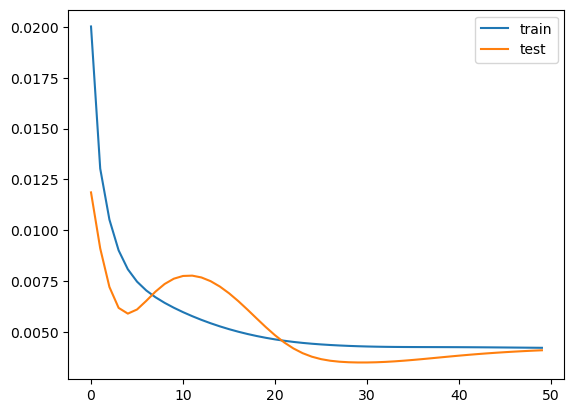

124/124 [==============================] - 1s 2ms/step
Test RMSE: 63.315
Test MAE: 34.349


In [11]:
data = read_csv('energydata_complete.csv')
data['date'] = to_datetime(data['date'])
data.set_index('date', inplace=True)
data.drop(data.columns[[1, -2, -1]], axis=1, inplace=True)

# Preprocessing
values = data.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning

reframed = series_to_supervised(scaled, 1, 1)

columns_to_drop = list(range(26, 50))  # This will create a list of columns from index 26 to 50
reframed.drop(reframed.columns[columns_to_drop], axis=1, inplace=True)


values = reframed.values
n = int(len(values) * 0.8)
train = values[:n, :]
test = values[n:, :]
# split into input and outputs
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

import matplotlib.pyplot as plt
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model = Sequential()
model.add(SimpleRNN(15,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)



# Training the model
history = model.fit(X_train, y_train, epochs=150, batch_size=100, validation_data=(X_test, y_test), verbose=2, shuffle=False, callbacks=[early_stopping])



plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
yhat = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, X_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((y_test, X_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
test_mae = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % test_mae)


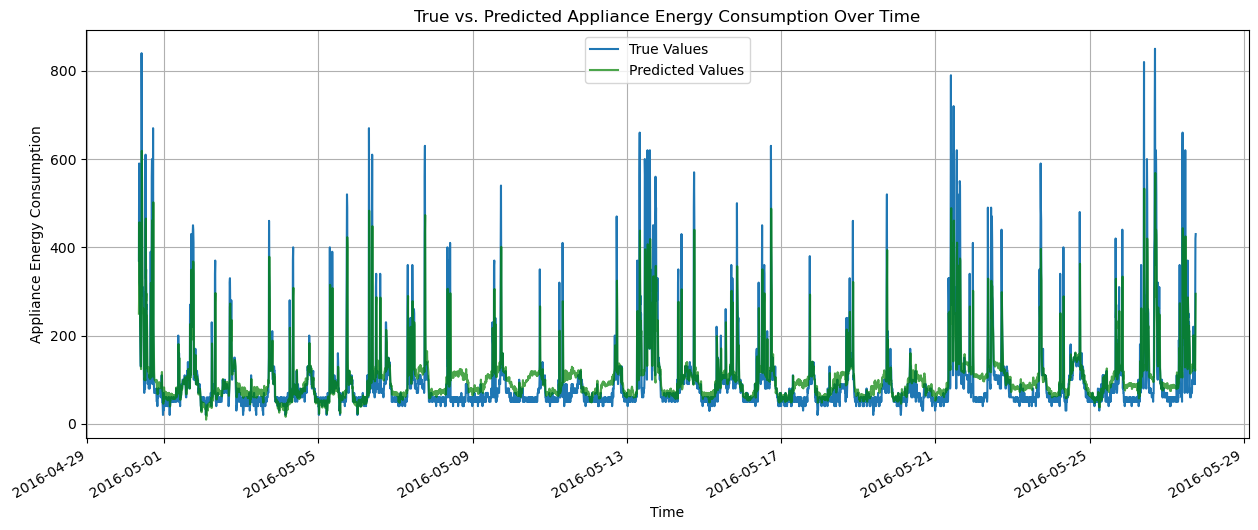

In [12]:
test_timestamps = data.iloc[-len(X_test):].index
target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(data["Appliances"].values.reshape(-1, 1))
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(test_timestamps, target_scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Values')
plt.plot(test_timestamps, inv_yhat, label='Predicted Values', alpha=0.7, color = 'green')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.title('True vs. Predicted Appliance Energy Consumption Over Time')
plt.legend()
plt.grid(True)

# Formatting the date on the x-axis for better readability

plt.gcf().autofmt_xdate()  # Rotate date labels

plt.show()



# ARIMA

Results of Dickey-Fuller Test:
Test Statistic                   -21.616378
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    19723.000000
Critical Value (1%)               -3.430682
Critical Value (5%)               -2.861687
Critical Value (10%)              -2.566848
dtype: float64


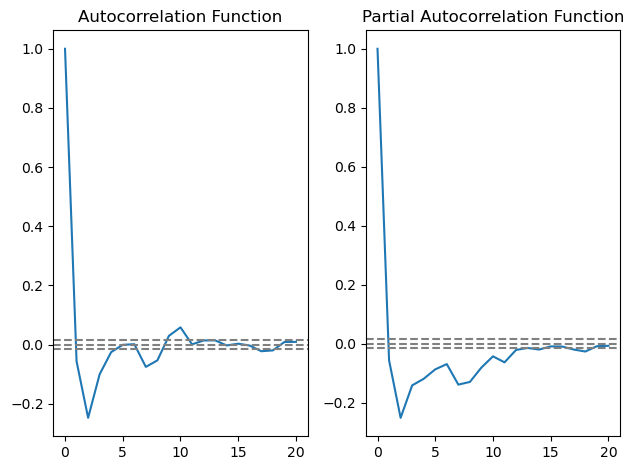

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
data = pd.read_csv('energydata_complete.csv', index_col='date', parse_dates=True)
data = data['Appliances']

# Step 2: Check for stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(data)

# If necessary, difference the data to make it stationary
data_diff = data.diff().dropna()

# Step 3: Determine ARIMA Parameters
lag_acf = acf(data_diff, nlags=20)
lag_pacf = pacf(data_diff, nlags=20, method='ols')

# Plot ACF and PACF
plt.figure()
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\mkche\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
C:\Users\mkche\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
C:\Users\mkche\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


Test RMSE: 90.657
Test MAE: 52.527


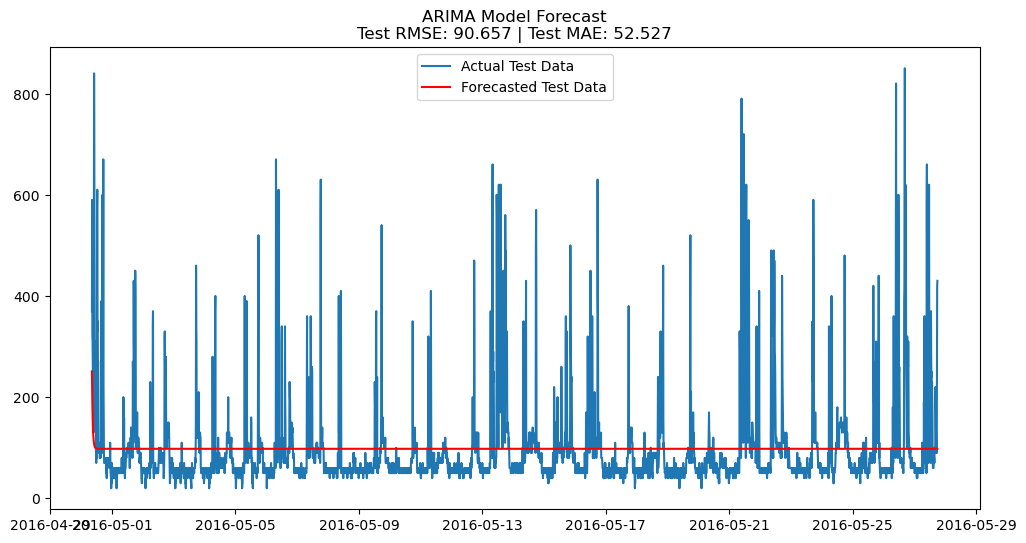

In [29]:
# Step 4: Build and fit the ARIMA model
# The p, d, q values can be determined based on the ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your time series data and is already stationary
# Split the dataset into train and test sets
n = int(len(data) * 0.8)
train, test = data[:n], data[n:]

# Fit the ARIMA model on the training data
model = ARIMA(train, order=(1, 0, 0))  # Use the determined order from previous steps
results_ARIMA = model.fit()

# Forecast the test dataset
forecast = results_ARIMA.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')

# Plot the results
plt.figure(figsize=(12, 6))  # Increase the figure size to make it wider
plt.plot(test, label='Actual Test Data')
plt.plot(forecast, label='Forecasted Test Data', color='red')
plt.title(f'ARIMA Model Forecast\nTest RMSE: {rmse:.3f} | Test MAE: {mae:.3f}')
plt.legend()
plt.show()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097
